# <font color='DarkBlue'> <center> CREDIT RISK ANALYSIS

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### let's see, how does the data looks like

In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\admin\OneDrive\Documents\Inno ML DL\Machine Learning Imp files\Bank Defaulter Prediction\credit_risk_dataset.csv")

# inspecting the first 10 rows of the dataset
df.head(10).style.background_gradient(cmap = 'Pastel2')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000000,PERSONAL,D,35000,16.020000,1,0.590000,Y,3
1,21,9600,OWN,5.000000,EDUCATION,B,1000,11.140000,0,0.100000,N,2
2,25,9600,MORTGAGE,1.000000,MEDICAL,C,5500,12.870000,1,0.570000,N,3
3,23,65500,RENT,4.000000,MEDICAL,C,35000,15.230000,1,0.530000,N,2
4,24,54400,RENT,8.000000,MEDICAL,C,35000,14.270000,1,0.550000,Y,4
5,21,9900,OWN,2.000000,VENTURE,A,2500,7.140000,1,0.250000,N,2
6,26,77100,RENT,8.000000,EDUCATION,B,35000,12.420000,1,0.450000,N,3
7,24,78956,RENT,5.000000,MEDICAL,B,35000,11.110000,1,0.440000,N,4
8,24,83000,RENT,8.000000,PERSONAL,A,35000,8.900000,1,0.420000,N,2
9,21,10000,OWN,6.000000,VENTURE,D,1600,14.740000,1,0.160000,N,3


`observation`: Columns need a proper names, looks like loan status is our target column. There is no customer gender column.

#### Size of the data

In [3]:
df.shape

(32581, 12)

we have 32 thosand 581 rows and 12 columns, pretty enough for model building.

#### Exploring the Data types of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Exploring the missing values in the data

In [5]:
# Printing the count of null values in each column
print(df.isnull().sum())

# Printing the percentage of null values in each column
print('\n')
print(df.isnull().sum() / len(df) * 100)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


we got 3116 null values in the loan interest rate column and 895 in person employement history. let's see what's the percentage of these null values. Then we can decide to remove or imputate.

`Observation`: 

### Let's see the data statistically

In [6]:
df.describe().style.background_gradient(cmap = 'Pastel2')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,66074.848470,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,61983.119168,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6000000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


`Observation`: There's a huge jump of maximum values in Age, Employement history and credit history. We can say there are lot of outliers

#### Exploring duplicate values

In [7]:
df.duplicated().sum()

165

There are 165 duplicate values in our data, we will drop those duplicates for good and effective model.

### Checking the correlation of data

In [8]:
# Calculating the correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True)

# Applying background gradient styling to the correlation matrix
styled_correlation = correlation_matrix.style.background_gradient(cmap='Pastel2')


Lets check with the target variable

<Axes: >

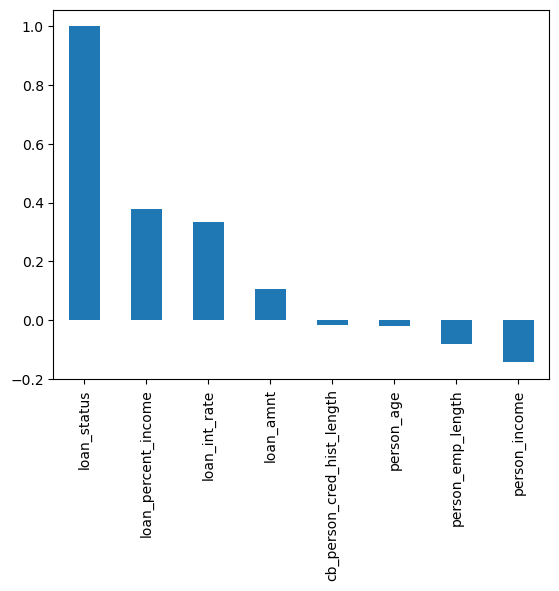

In [9]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False).plot(kind='bar')

`Observation`: As we can see Loan interest rate and Loan percent on income columns are high positively correlated, while Customer's age and Customer's credit history negatively correlated.

### Data Manipulation

In [10]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

#### Renaming Columns

In [11]:
# Renaming columns using df.rename() method with a dictionary mapping old names to new names
df.rename(columns={
    'person_age': 'CustomerAge',  # Renaming 'person_age' column to 'CustomerAge'
    'person_income': 'CustomerIncome',  # Renaming 'person_income' column to 'CustomerIncome'
    'person_home_ownership': 'CustomerPropertyStatus',  # Renaming 'person_home_ownership' to'CustomerPropertyStatus'
    'person_emp_length': 'EmploymentHistory',  # Renaming 'person_emp_length' column to 'EmploymentHistory'
    'loan_intent': 'LoanPurpose',  # Renaming 'loan_intent' column to 'LoanPurpose'
    'loan_grade': 'LoanGrade',  # Renaming 'loan_grade' column to 'LoanGrade'
    'loan_amnt': 'LoanAmount',  # Renaming 'loan_amnt' column to 'LoanAmount'
    'loan_int_rate': 'InterestRate',  # Renaming 'loan_int_rate' column to 'InterestRate'
    'loan_percent_income': 'LoanPercentOnIncome',  # Renaming 'loan_percent_income' column to 'LoanPercentOnIncome'
    'cb_person_default_on_file': 'CbDefaultStatus',  # Renaming 'cb_person_default_on_file' column to 'CbDefaultStatus'
    'cb_person_cred_hist_length': 'CreditHistory',  # Renaming 'cb_person_cred_hist_length' column to 'CreditHistory'
    'loan_status': 'LoanStatus'  # Renaming 'loan_status' column to 'LoanStatus'
}, inplace=True)  # Modifying the DataFrame inplace

In [12]:
# Dropping duplicates from the DataFrame in place
df.drop_duplicates(inplace=True)

# Checking if there are any remaining duplicates after dropping
print(df.duplicated().sum())  # This will print 0 as there are no duplicates left


0


In [13]:
# Dropping the 'LoanPercentOnIncome' column from the DataFrame
df.drop(columns=['LoanPercentOnIncome'], axis=1, inplace=True)

In [14]:
df.shape

(32416, 11)

Now we are going to imputate the employement history column, but before doing that we are going to see the data distribution of that column.

#### Experimenting and finding the best method to impute

In [15]:
## finding the best way to impute 

# Variance calculation for EmploymentHistory
original_var_eh = df['EmploymentHistory'].var()
mean_imputed_var_eh = df['EmploymentHistory'].fillna(df['EmploymentHistory'].mean()).var()
median_imputed_var_eh = df['EmploymentHistory'].fillna(df['EmploymentHistory'].median()).var()
poly_interpolated_var_eh = df['EmploymentHistory'].interpolate(method='polynomial', order=1).var()
quad_interpolated_var_eh = df['EmploymentHistory'].interpolate(method='quadratic').var()
nearest_interpolated_var_eh = df['EmploymentHistory'].interpolate(method='nearest').var()

# Variance calculation for InterestRate
original_var_ir = df['InterestRate'].var()
mean_imputed_var_ir = df['InterestRate'].fillna(df['InterestRate'].mean()).var()
median_imputed_var_ir = df['InterestRate'].fillna(df['InterestRate'].median()).var()
linear_interpolated_var_ir = df['InterestRate'].interpolate().var()
quad_interpolated_var_ir = df['InterestRate'].interpolate(method='quadratic').var()
nearest_interpolated_var_ir = df['InterestRate'].interpolate(method='nearest').var()

# Print the results
print("EmploymentHistory Variance:")
print(f"Original: {original_var_eh}")
print(f"Mean Imputing: {mean_imputed_var_eh}")
print(f"Median Imputing: {median_imputed_var_eh}")
print(f"Interpolate with Polynomial: {poly_interpolated_var_eh}")
print(f"Interpolate with Quadratic: {quad_interpolated_var_eh}")
print(f"Interpolate with Nearest: {nearest_interpolated_var_eh}\n")

print("InterestRate Variance:")
print(f"Original: {original_var_ir}")
print(f"Mean Imputing: {mean_imputed_var_ir}")
print(f"Median Imputing: {median_imputed_var_ir}")
print(f"Interpolate with Linear: {linear_interpolated_var_ir}")
print(f"Interpolate with Quadratic: {quad_interpolated_var_ir}")
print(f"Interpolate with Nearest: {nearest_interpolated_var_ir}")

EmploymentHistory Variance:
Original: 17.18508375694324
Mean Imputing: 16.714833277461246
Median Imputing: 16.731465238496096
Interpolate with Polynomial: 16.927014430996483
Interpolate with Quadratic: 17.191081577396805
Interpolate with Nearest: 17.144026708017144

InterestRate Variance:
Original: 10.50849190274181
Mean Imputing: 9.505135973728034
Median Imputing: 9.505200175670486
Interpolate with Linear: 10.024125329552284
Interpolate with Quadratic: 10.752605955111227
Interpolate with Nearest: 10.499085142550133


In [16]:
df.columns

Index(['CustomerAge', 'CustomerIncome', 'CustomerPropertyStatus',
       'EmploymentHistory', 'LoanPurpose', 'LoanGrade', 'LoanAmount',
       'InterestRate', 'LoanStatus', 'CbDefaultStatus', 'CreditHistory'],
      dtype='object')

In [17]:
# Imputing missing values using the interpolate method with nearest neighbor interpolation for 'EmploymentHistory' column
df['EmploymentHistory'] = df['EmploymentHistory'].interpolate(method='nearest')

# Imputing missing values using the interpolate method with linear interpolation (default) for 'InterestRate' column
df['InterestRate'] = df['InterestRate'].interpolate()

## Exploratory Data Analysis. 

### Exploring any significance between cat vs Loan Status

In [18]:
from scipy.stats import chi2_contingency

# List of columns of interest for chi-square test
columns_of_interest = ['CustomerPropertyStatus', 'CbDefaultStatus', 'LoanPurpose', 'LoanGrade']

# Performing chi-square test for each column of interest
for column in columns_of_interest:
    # Creating contingency table for the current column and 'LoanStatus'
    contingency_table = pd.crosstab(df[column], df['LoanStatus'])
    
    # Performing chi-square test and obtaining chi-square statistic, p-value, degrees of freedom, and expected frequencies
    chi2, p_val_chi2, dof, expected = chi2_contingency(contingency_table)
    
    # Printing results of chi-square test for the current column
    print(f"Chi-square Statistic for {column}: {chi2}")
    print(f"P-value (Chi-square) for {column}: {p_val_chi2}")
    print('\n')

Chi-square Statistic for CustomerPropertyStatus: 1894.3526733955891
P-value (Chi-square) for CustomerPropertyStatus: 0.0


Chi-square Statistic for CbDefaultStatus: 1041.973789110078
P-value (Chi-square) for CbDefaultStatus: 1.3516442792486318e-228


Chi-square Statistic for LoanPurpose: 520.1813803410885
P-value (Chi-square) for LoanPurpose: 3.5123818980037483e-110


Chi-square Statistic for LoanGrade: 5588.326418998944
P-value (Chi-square) for LoanGrade: 0.0




`Observation`:
- The chi-square test we performed shows a statistically significant relationship between the Loan Grade and Loan Status variables. The p-value of 0.0 indicates that there is a very low probability of observing such an extreme association between these variables by chance, assuming that there is no actual relationship in the population.

- However, it's important to note that the chi-square test only tells us that there is a significant association between the variables, but it doesn't provide information about the strength or direction of the association.

- Let's further understand the strength of the association, you can calculate Cramer's V, which is a measure of the strength of association for categorical variables in a contingency table. 

In [19]:
def cramers_v(contingency_table):
    # Calculate chi-square statistic and expected frequencies
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    # Calculate phi-squared (phi2)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    
    # Calculate corrected phi-squared (phi2corr)
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1) * (r-1)) / (n-1))
    
    # Calculate corrected degrees of freedom
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    
    # Calculate Cramer's V statistic
    cramer_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    return cramer_v

# List of columns of interest for Cramer's V calculation
columns_of_interest = ['CustomerPropertyStatus', 'CbDefaultStatus', 'LoanPurpose', 'LoanGrade']

# Loop through each column of interest to compute Cramer's V
for column in columns_of_interest:
    # Create contingency table for the current column and 'LoanStatus'
    contingency_table = pd.crosstab(df[column], df['LoanStatus'])
    
    # Calculate Cramer's V for the current column
    cramer_v = cramers_v(contingency_table)
    
    # Print Cramer's V value for the current column
    print(f"Cramer's V for {column}: {cramer_v}")

Cramer's V for CustomerPropertyStatus: 0.24155344484697752
Cramer's V for CbDefaultStatus: 0.17920366112197894
Cramer's V for LoanPurpose: 0.1260686207328454
Cramer's V for LoanGrade: 0.41498709725773153


`Observation`:
- The calculated Cramer's V value of approximately 0.415 indicates a moderate association between the Loan Grade and Loan Status variables. Cramer's V ranges from 0 to 1, where:

0 indicates no association,
1 indicates a perfect association, and Values in between indicate varying degrees of association.

- A Cramer's V value of around 0.415 suggests that there is a noticeable but not extremely strong relationship between Loan Grade and Loan Status in your data. It's important to interpret this value in the context of your specific dataset and domain knowledge.

- For further analysis or interpretation, let's explore additional statistical tests, visualizations, or domain-specific insights to better understand the nature and implications of this association.

### Distribution of Age 

- let's see the customers age distribution

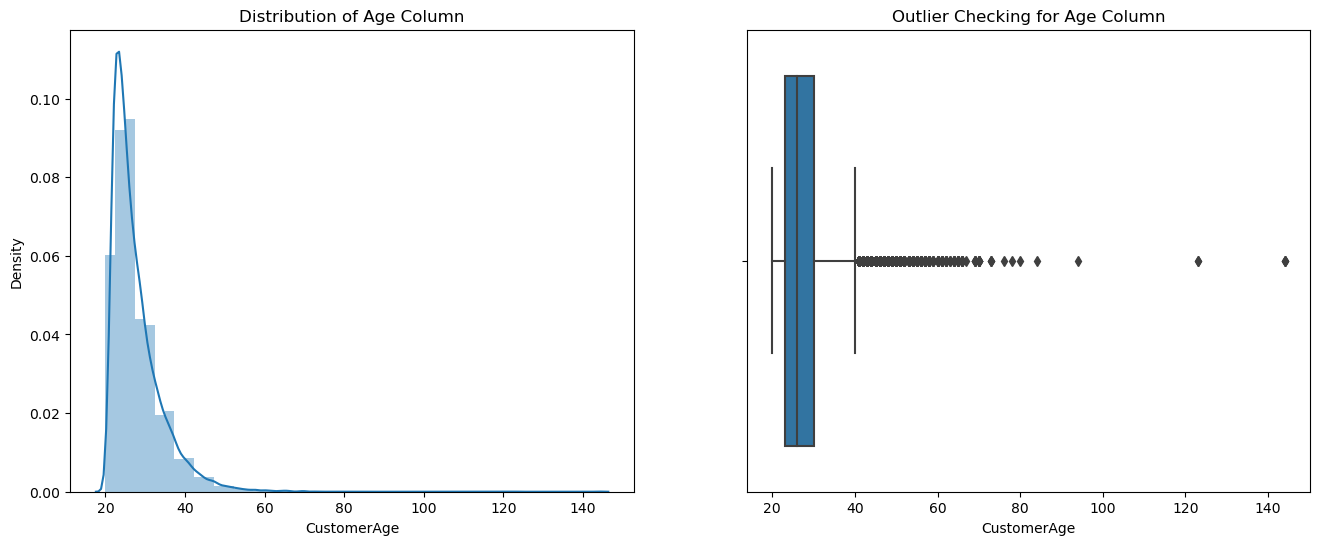

In [20]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'CustomerAge'
sns.distplot(df['CustomerAge'], ax=axes[0])
axes[0].set_title('Distribution of Age Column')

# Plotting boxplot for 'CustomerAge' to check for outliers
sns.boxplot(x=df['CustomerAge'], ax=axes[1])
axes[1].set_title('Outlier Checking for Age Column')

# Display the plots
plt.show()

`Observation`: 72.07% of customers are in the age of 20-30, 18.45% of customers are in the age group of 30-40, 4.33% of customers are in the age group of 40-60. Customers age of 22 are 12% or 7500 outof 32500, followed by customers age of 24, who are 10% or around 6500 out of 32500. 

Cutomers, age of 22 and 24 high in distribution, they must be students. 

### Customer Income Distribution

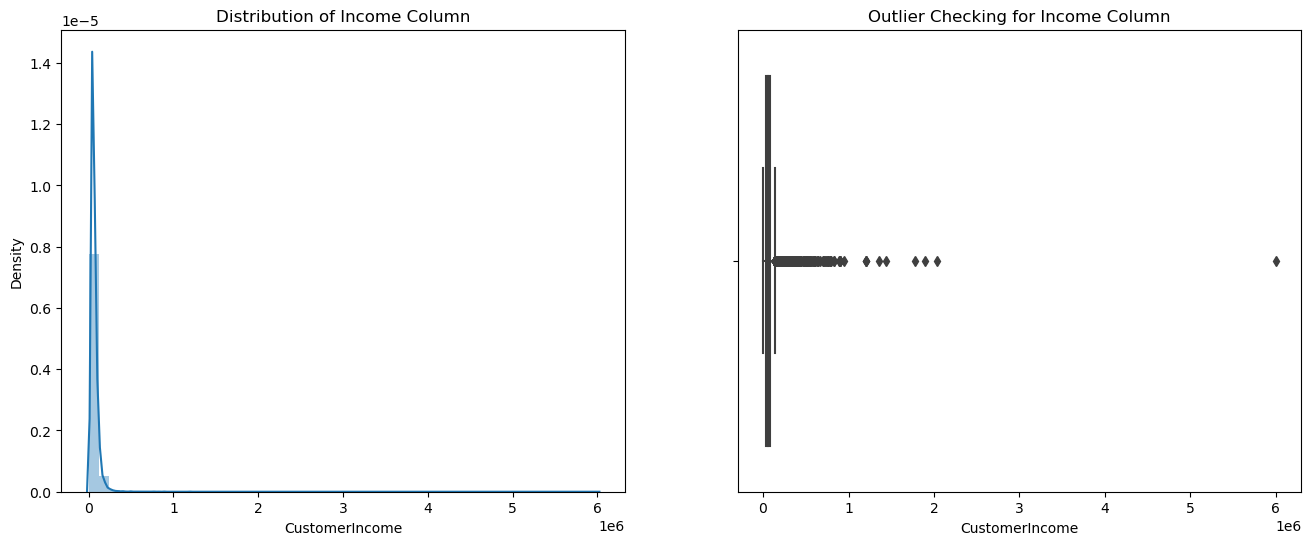

In [21]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'CustomerIncome'
sns.distplot(df['CustomerIncome'], ax=axes[0])
axes[0].set_title('Distribution of Income Column')

# Plotting boxplot for 'CustomerIncome' to check for outliers
sns.boxplot(x=df['CustomerIncome'], ax=axes[1])
axes[1].set_title('Outlier Checking for Income Column')

# Display the plots
plt.show()

`Observation`:

**Distribution of Income:**
- .On the x-axis, we have the “CustomerIncome” ranging from 0 to approximately 6 million.
- The y-axis represents density, with values ranging from 0 to 1.4.
- The plot reveals a sharp peak at the lower end of customer incomes, indicating that a significant number of customers fall into the lower income brackets.

**Outlier Identification:**
- Several data points lie outside this range on both sides, suggesting outliers with significantly higher or lower incomes.

### Distribution Employment History Column

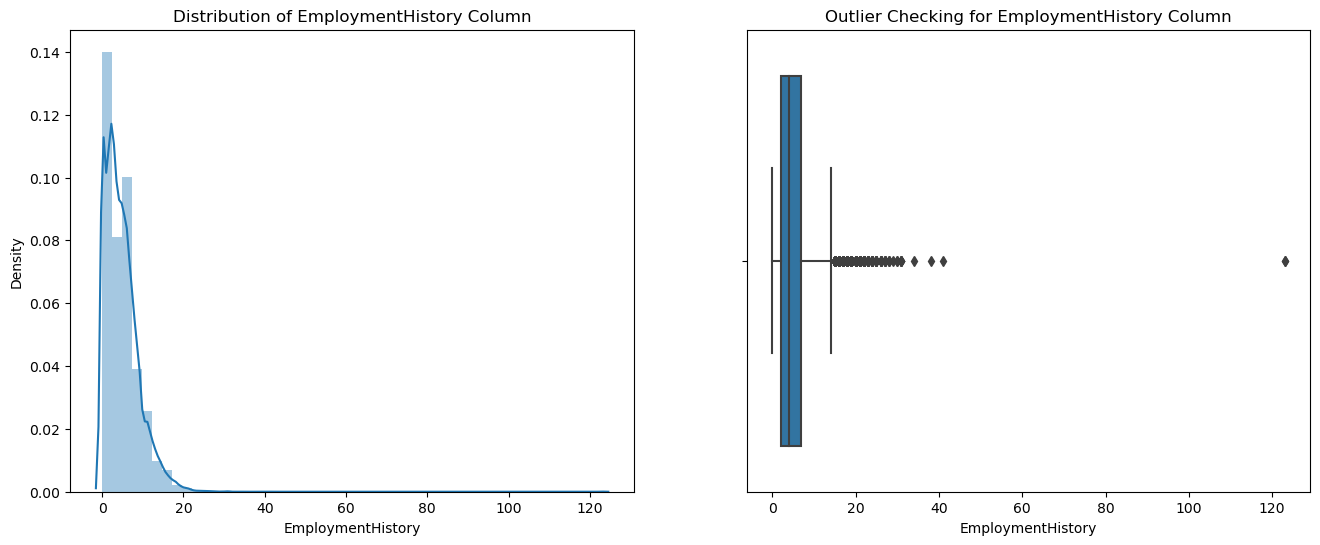

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'EmploymentHistory'
sns.distplot(df['EmploymentHistory'], ax=axes[0])
axes[0].set_title('Distribution of EmploymentHistory Column')

# Plotting boxplot for 'EmploymentHistory' to check for outliers
sns.boxplot(x=df['EmploymentHistory'], ax=axes[1])
axes[1].set_title('Outlier Checking for EmploymentHistory Column')

# Display the plots
plt.show()

`Observation`:
- Employment History Density: The graph indicates a higher density of individuals with shorter employment histories, suggesting that most people have worked for fewer years.

- Declining Trend: There is a rapid decline in density as the years of employment history increase, which could imply a smaller proportion of the workforce with long-term employment.

- There are even people who worked for so long too, which are outliers.

### Loan Amount 

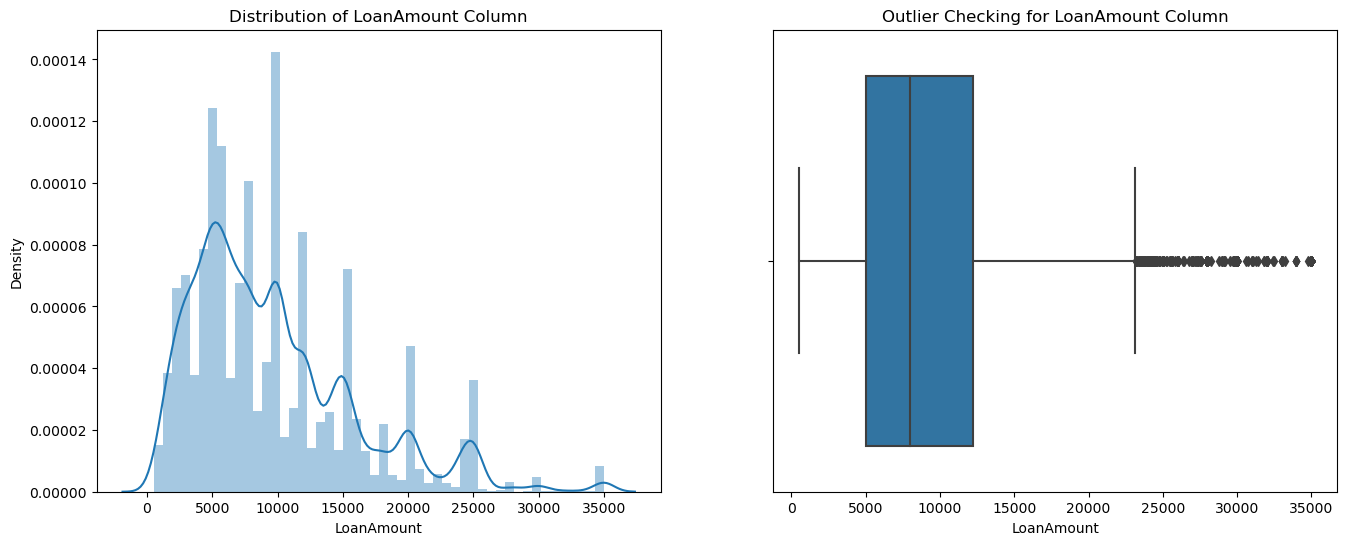

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'LoanAmount'
sns.distplot(df['LoanAmount'], ax=axes[0])
axes[0].set_title('Distribution of LoanAmount Column')

# Plotting boxplot for 'LoanAmount' to check for outliers
sns.boxplot(x=df['LoanAmount'], ax=axes[1])
axes[1].set_title('Outlier Checking for LoanAmount Column')

# Display the plots
plt.show()

`Observation`
**Distribution of Loan Amount:**

- On the left, we have a histogram overlaid with a line graph.
- The x-axis represents the LoanAmount, ranging from 0 to 35000.
- The y-axis shows density, with values up to approximately 0.00014.
- Notable peaks in the distribution occur around loan amounts of 5000, 10000, and 15000.

**Outlier Identification:**
- The right graph is a box plot specifically designed to identify outliers.
- Again, the x-axis represents LoanAmount (same range as the left graph).
- There’s no y-axis label since it’s a box plot.
- The central box represents the interquartile range (IQR), where most loan amounts fall.
- Outliers are plotted as individual points to the right of the box.

### Interest Rate

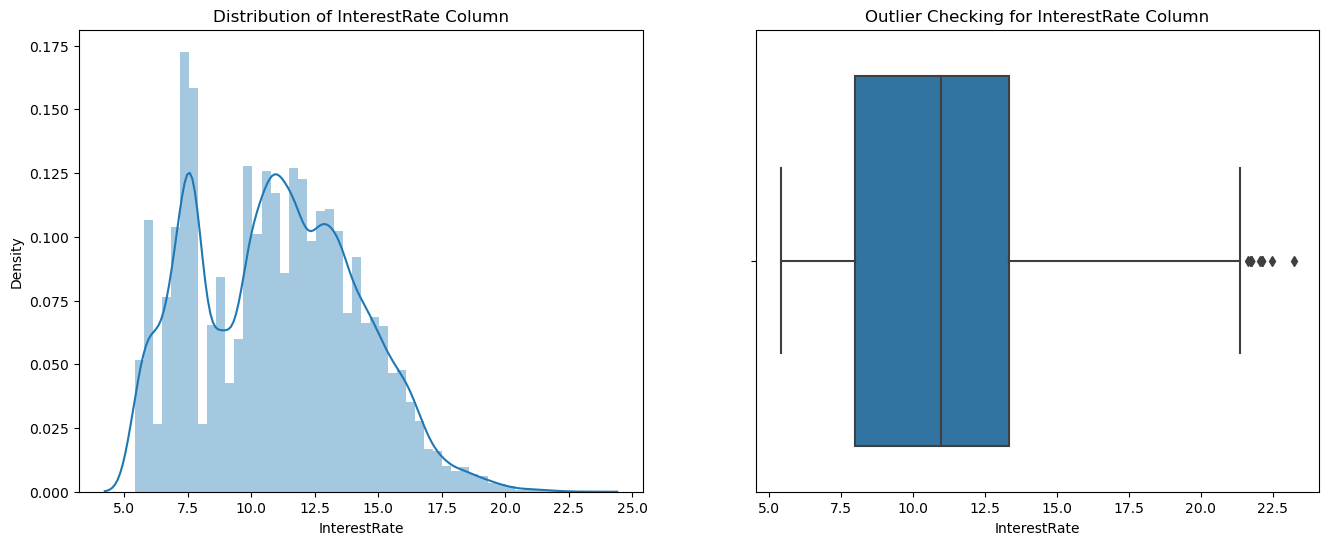

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'InterestRate'
sns.distplot(df['InterestRate'], ax=axes[0])
axes[0].set_title('Distribution of InterestRate Column')

# Plotting boxplot for 'InterestRate' to check for outliers
sns.boxplot(x=df['InterestRate'], ax=axes[1])
axes[1].set_title('Outlier Checking for InterestRate Column')

# Display the plots
plt.show()

### Credit History

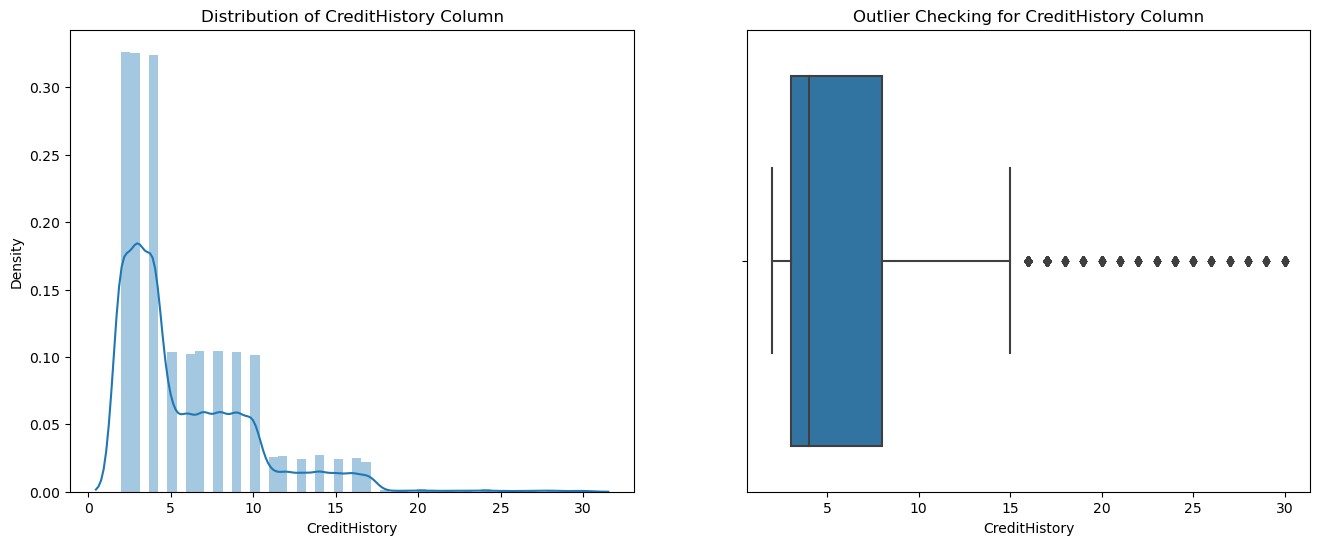

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'CreditHistory'
sns.distplot(df['CreditHistory'], ax=axes[0])
axes[0].set_title('Distribution of CreditHistory Column')

# Plotting boxplot for 'CreditHistory' to check for outliers
sns.boxplot(x=df['CreditHistory'], ax=axes[1])
axes[1].set_title('Outlier Checking for CreditHistory Column')

# Display the plots
plt.show()

### Distribution of LoanStatus

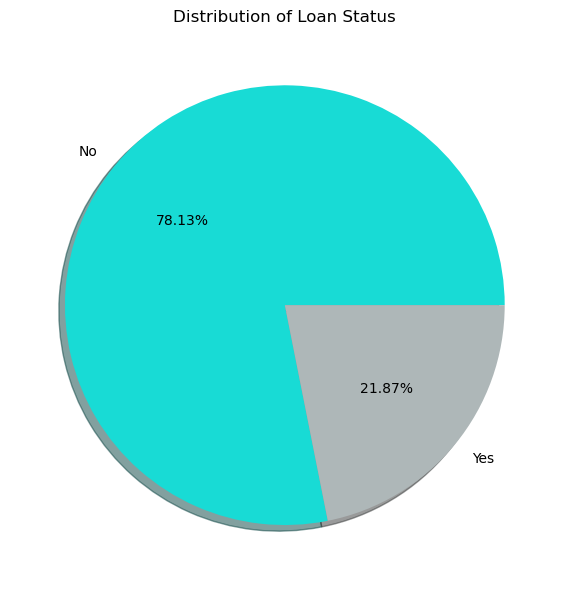

In [26]:
loansts = df['LoanStatus'].value_counts()

# Defining labels and colors for the pie chart
labels = ['No', 'Yes']
colors = ['#18dbd5', '#aeb7b8']

# Creating a pie chart to show the distribution of 'LoanStatus'
plt.figure(figsize=(10, 6))
plt.pie(loansts, labels=labels, shadow=True, autopct='%1.2f%%', colors=colors)
plt.title("Distribution of Loan Status")
plt.tight_layout()
plt.show()

`Observation`: Loan Status Column is highly imbalanced

- The pie chart represents the distribution of loan statuses.

**Two categories are depicted:**

- “No” (Not Defaulted): This category constitutes 78.13% of the loans.
- “Yes” (Defaulted): This category accounts for 21.87% of the loans.
- The distinct colors in the chart represent each category.

### Let's see how many of customers own a house.

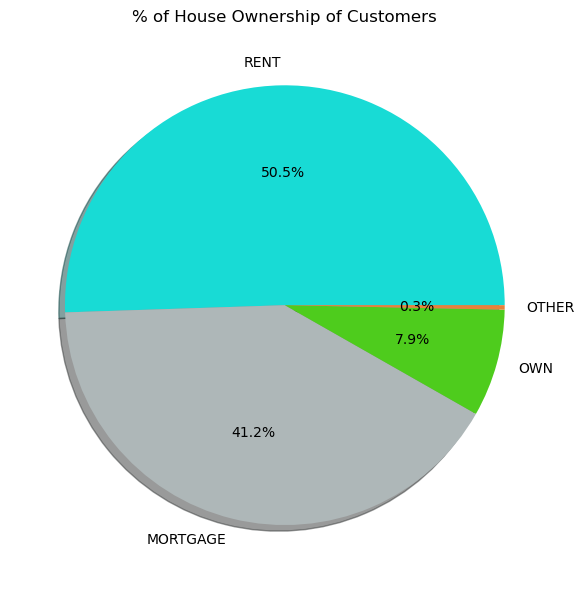

In [27]:
# Calculating the percentage of each house ownership category
home = df['CustomerPropertyStatus'].value_counts() / len(df) * 100

# Defining colors for the pie chart
color1 = ['#18dbd5', '#aeb7b8', '#4ecc1d', '#e6823c']

# Creating a pie chart to show the percentage of house ownership
plt.figure(figsize=(10, 6))
plt.pie(home, labels=home.index, autopct='%1.1f%%', shadow=True, colors=color1)
plt.title("% of House Ownership of Customers")
plt.tight_layout()

`Observation`: Interestingly more than half of the customers who got the loan, live in rented house. 41.2% of customers live in mortgage house, only 7.9% of customers live in own house. 

### Loan Purpose

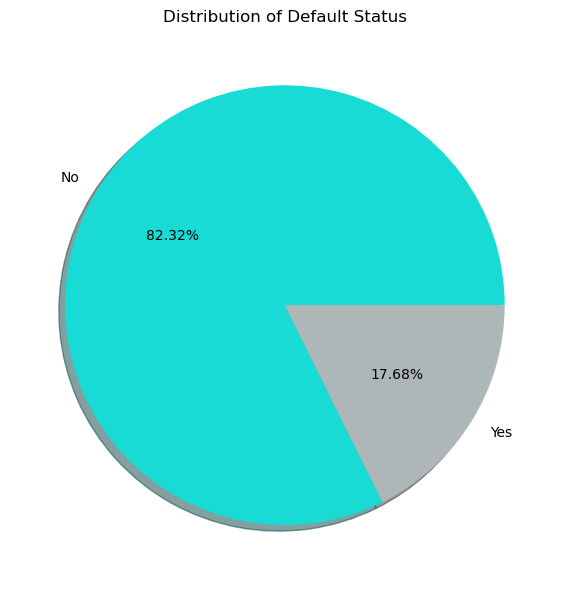

In [28]:
default_status = df['CbDefaultStatus'].value_counts()

# Define labels and colors for the pie chart
labels = ['No', 'Yes']

plt.figure(figsize=(10, 6))
plt.pie(default_status, labels=labels, shadow=True, autopct='%1.2f%%', colors=color1)
plt.title("Distribution of Default Status")
plt.tight_layout()
plt.show()

### Distribution of Loan Grade

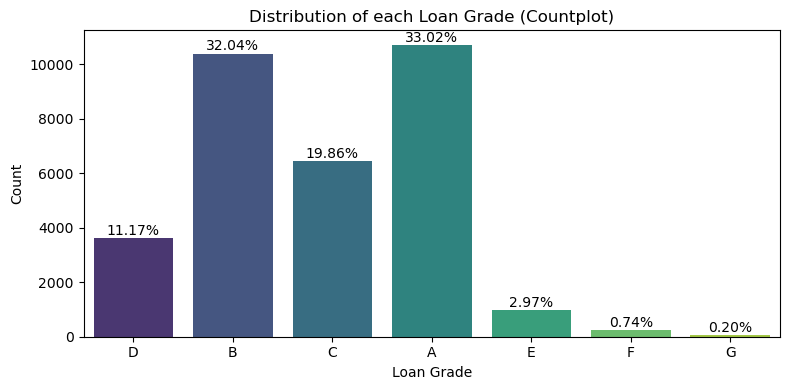

In [29]:
loangrade = df['LoanGrade'].value_counts()
label = loangrade.index

plt.figure(figsize=(8, 4))

# Create a countplot for 'LoanGrade' using Seaborn
sns.countplot(x='LoanGrade', data=df, palette='viridis')

# Add percentage labels on top of bars
total = float(len(df['LoanGrade']))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 2, f'{height / total * 100:.2f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Distribution of each Loan Grade (Countplot)')
plt.tight_layout()
plt.show()

### Customer Income Vs LoanAmount

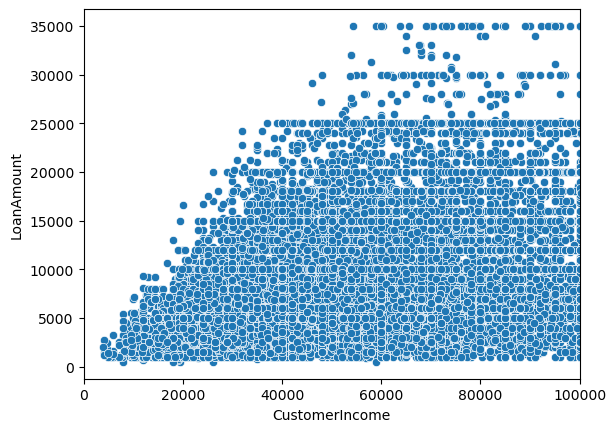

In [30]:
# Create a scatter plot for 'CustomerIncome' vs 'LoanAmount'
sns.scatterplot(x='CustomerIncome', y='LoanAmount', data=df)

# Set the x-axis limit to show only data points where CustomerIncome is less than or equal to 100000
plt.xlim(0, 100000)

# Show the plot
plt.show()

`Observation`:

**Data Points:**
- Blue dots are scattered across the plot, forming a triangular shape.
- The concentration of dots is higher in the lower income and loan amount area.
- Fewer dots appear at higher income levels and loan amounts.

**Axes Values:**
- The x-axis values range from 0 to 100,000, representing various customer incomes.
- The y-axis values range from 0 to 35,000, indicating different loan amounts.

### Age vs Income

In [31]:
# Filter data into different age groups
youth = df[(df['CustomerAge'] > 19) & (df['CustomerAge'] < 26)]
adult = df[(df['CustomerAge'] > 26) & (df['CustomerAge'] < 31)]
pre_middle_age = df[(df['CustomerAge'] > 31) & (df['CustomerAge'] < 41)]
middle_aged = df[(df['CustomerAge'] >= 41) & (df['CustomerAge'] < 51)]
old = df[(df['CustomerAge'] >= 51) & (df['CustomerAge'] < 70)]

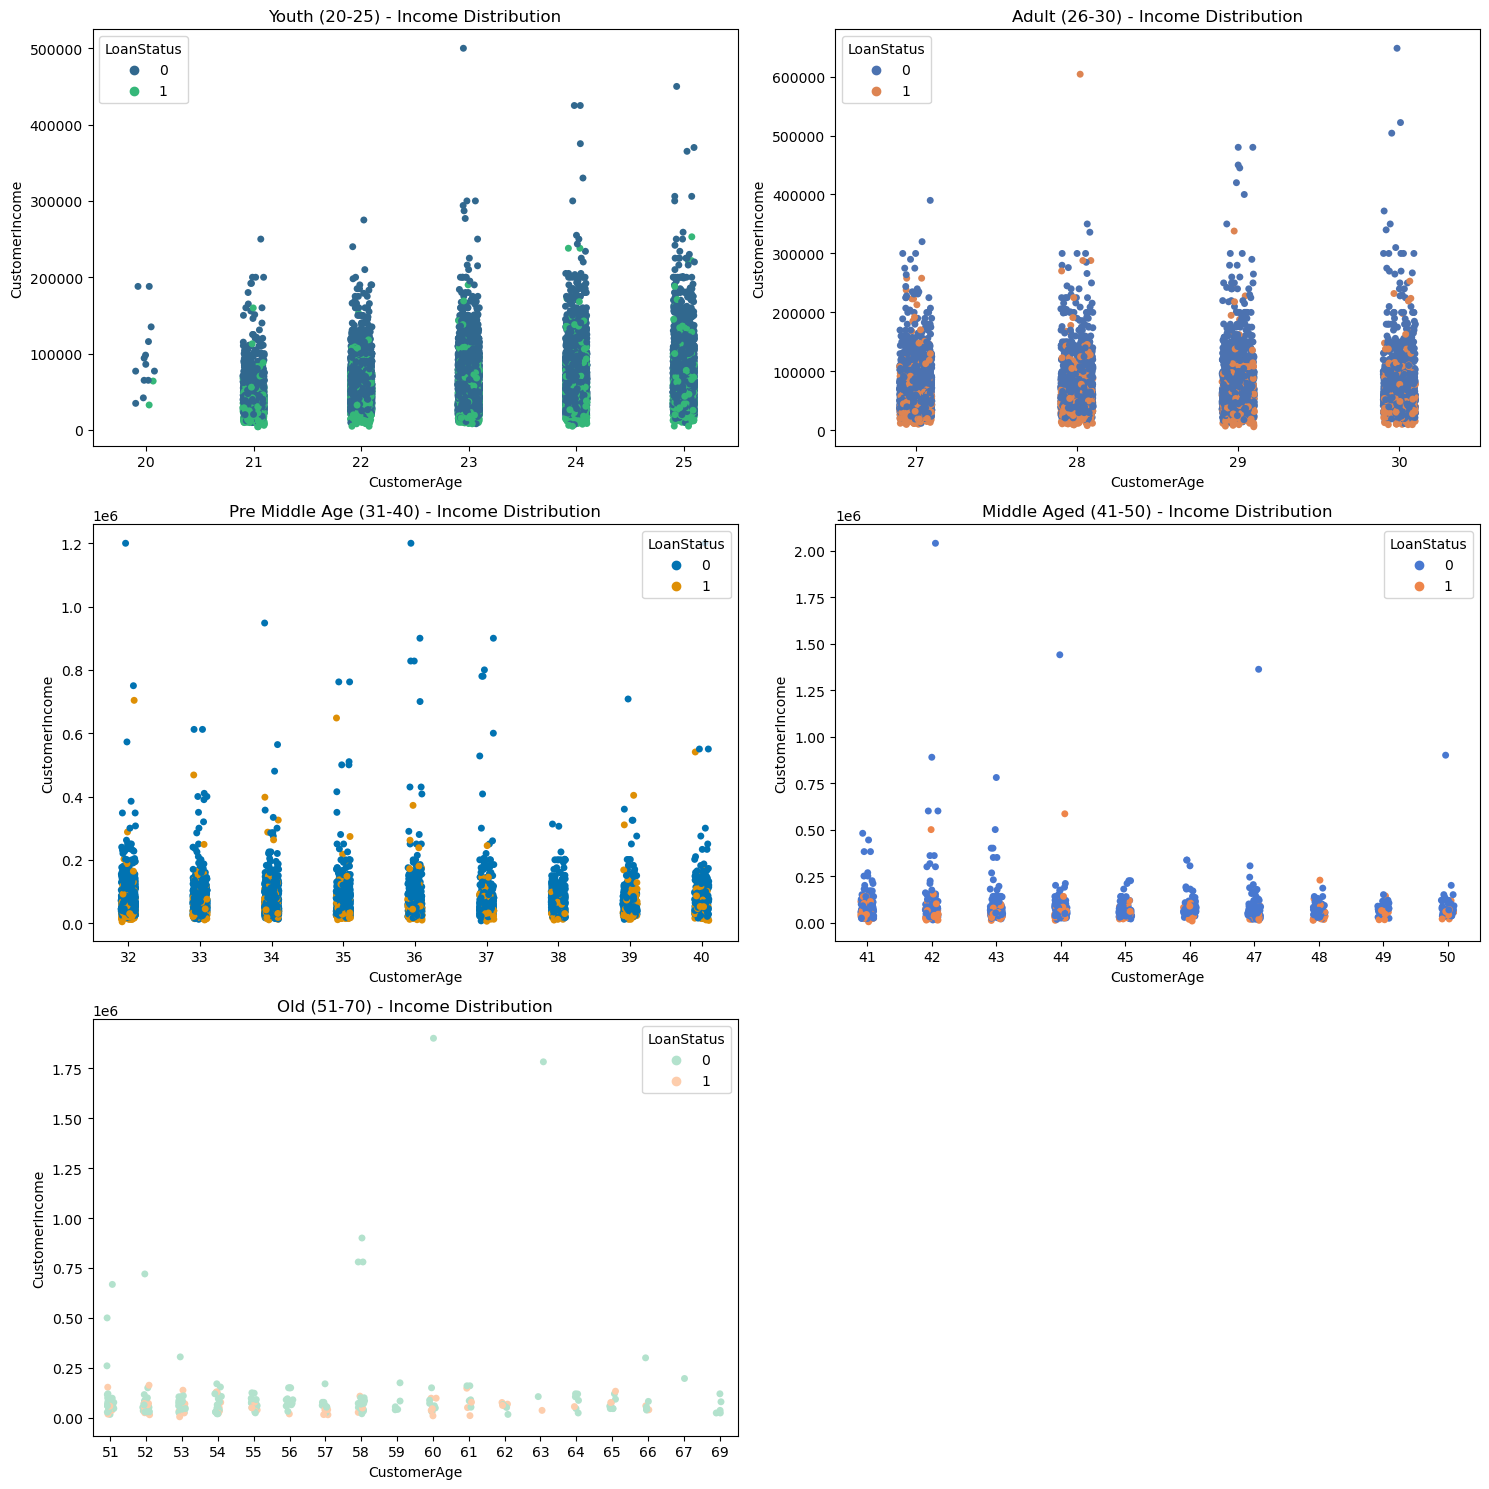

In [32]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot stripplots for each age group with income distribution
sns.stripplot(x='CustomerAge', y='CustomerIncome', data=youth, palette='viridis', jitter=True, hue='LoanStatus', ax=axes[0, 0])
axes[0, 0].set_title('Youth (20-25) - Income Distribution')

sns.stripplot(x='CustomerAge', y='CustomerIncome', data=adult, palette='deep', jitter=True, hue='LoanStatus', ax=axes[0, 1])
axes[0, 1].set_title('Adult (26-30) - Income Distribution')

sns.stripplot(x='CustomerAge', y='CustomerIncome', data=pre_middle_age, palette='colorblind', jitter=True, hue='LoanStatus', ax=axes[1, 0])
axes[1, 0].set_title('Pre Middle Age (31-40) - Income Distribution')

sns.stripplot(x='CustomerAge', y='CustomerIncome', data=middle_aged, palette='muted', jitter=True, hue='LoanStatus', ax=axes[1, 1])
axes[1, 1].set_title('Middle Aged (41-50) - Income Distribution')

sns.stripplot(x='CustomerAge', y='CustomerIncome', data=old, palette='Pastel2', jitter=True, hue='LoanStatus', ax=axes[2, 0])
axes[2, 0].set_title('Old (51-70) - Income Distribution')

# Remove last subplot (empty)
fig.delaxes(axes[2, 1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

`Observation`: 
- The average income of 20-24 age customers is 58k, 24-30 customers earn 68k on an average, 30-40 customers earn 75k earn on an average. 

- Interestingly customers who live mortgage and own house are earning more than customers who live rented houses.

### Age vs Loan Amount

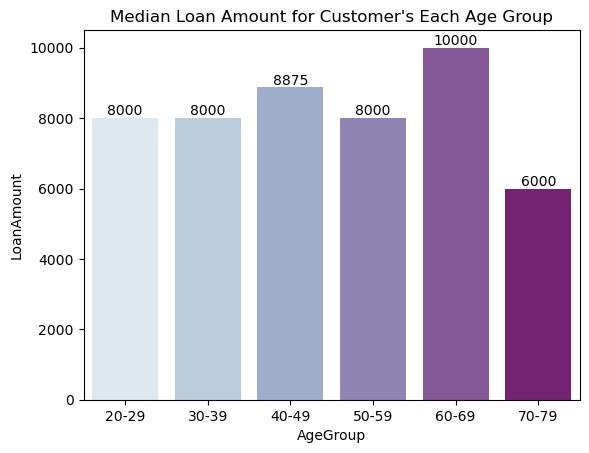

In [80]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Bin the age column using pd.cut()
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)


age = df.groupby(['AgeGroup'])['LoanAmount'].median().reset_index()

ax=sns.barplot(x='AgeGroup',y='LoanAmount',data=age, palette='BuPu')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Median Loan Amount for Customer's Each Age Group")
plt.show()

`Observation`:

**Data Bars:**
- The bars represent the median loan amount for each age group.
- Notably, there is a peak in the 60-69 age group.
- After that peak, there is a significant drop for those aged 70-79. 

### LoanGrade vs. InterestRate

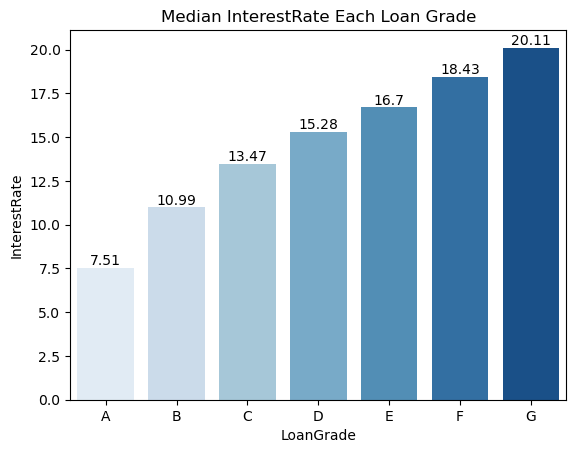

In [81]:
loan_interest = df.groupby(['LoanGrade'])['InterestRate'].median().reset_index()

# Create a bar plot with specified palette
ax = sns.barplot(x='LoanGrade', y='InterestRate', data=loan_interest, palette='Blues')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)
plt.title("Median InterestRate Each Loan Grade")
# Show the plot
plt.show()

`Observation`: 
**Each bar represents the median interest rate for a specific loan grade.**

- Loan Grade A: Median interest rate: 7.51

- Loan Grade B: Median interest rate: 10.99

- Loan Grade C: Median interest rate: 13.47

- Loan Grade D: Median interest rate: 15.28

- Loan Grade E: Median interest rate: 16.7

- Loan Grade F: Median interest rate: 18.43

- Loan Grade G: Highest median interest rate: 20.11

- As we analysed before, banks collect high interest rates from G grade loans in order to compensate the risk. Customers with bad credit history has no option other than to get the high interest loan. 

`Insight`: But why bank takes the risk?

- banks cross check the customer before giving the loans. Usually G grade customers does'nt have any assets for security so, banks verify their employment and wage. 
- If a customer defaults on loan, Lenders can file a case in a civil court seeking repayment. Defaulters may face asset seizure (if exists) or wage garnishment. Negotiation and settlement options may be explored before legal recourse.

### LoanPurpose vs. LoanAmount

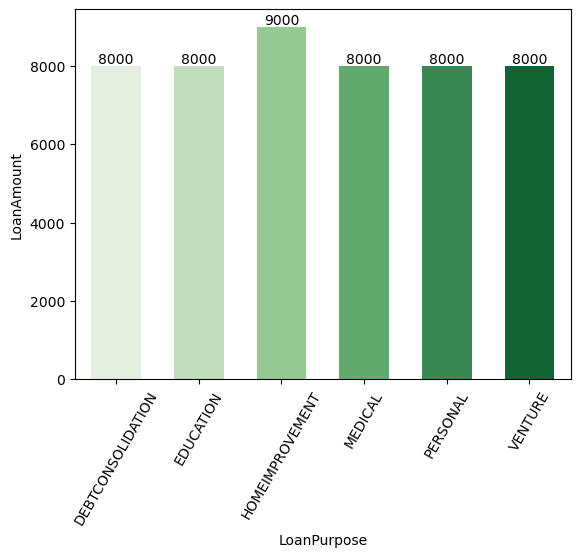

In [35]:
loanpurpose_amnt = df.groupby(['LoanPurpose'])['LoanAmount'].median().reset_index()

# Create a bar plot with specified width and palette
ax = sns.barplot(x='LoanPurpose', y='LoanAmount', data=loanpurpose_amnt, width=0.6, palette='Greens')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

`Observation`: Interestingly Other(might be lease) and mortgage ownership for Home Improvement got higher amount than rest of the customers

- There might be some reasons, one of them is usually banks give loan by checking the house as security for the loan repayment, if customer defaults the loan, the bank may seize the property.

### Credit History on Previous Default Status

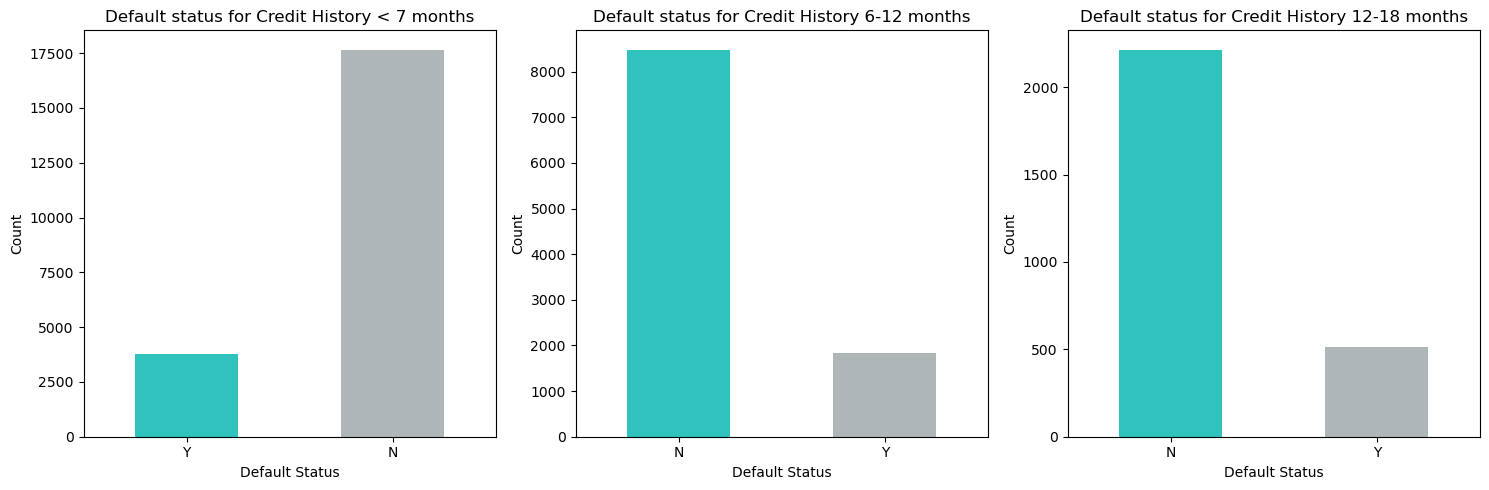

In [37]:
credit_6 = df[df['CreditHistory'] < 7]
credit_12 = df[(df['CreditHistory'] >= 6) & (df['CreditHistory'] < 13)]
credit_18 = df[(df['CreditHistory'] >= 12) & (df['CreditHistory'] < 19)]

# Create subplots for each credit history range
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot count plots for default status in each credit history range
sns.countplot(x='CbDefaultStatus', data=credit_6, saturation=0.75, width=0.5, ax=axes[0], palette=color1)
axes[0].set_title('Default status for Credit History < 7 months')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Count')

sns.countplot(x='CbDefaultStatus', data=credit_12, saturation=0.75, width=0.5, ax=axes[1], palette=color1)
axes[1].set_title('Default status for Credit History 6-12 months')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Count')

sns.countplot(x='CbDefaultStatus', data=credit_18, saturation=0.75, width=0.5, dodge=True, ax=axes[2], palette=color1)
axes[2].set_title('Default status for Credit History 12-18 months')
axes[2].set_xlabel('Default Status')
axes[2].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

`Observation`:

**Credit History Less Than 7 Months:**

- Default rate: Higher
- Indicates that individuals with shorter credit histories are more likely to default.

**Credit History 6-12 Months:**

- Default rate: Intermediate
- Shows a moderate default rate for individuals with credit histories between 6 and 12 months.

**Credit History 12-18 Months:**

- Default rate: Lower
- Reveals a significant decrease in defaults as credit history extends beyond 12 months.
- In summary, the graph highlights the correlation between longer credit histories and reduced default rates, emphasizing the importance of maintaining a positive credit history. 

### Loan Amount for Previously Defaulted Customers

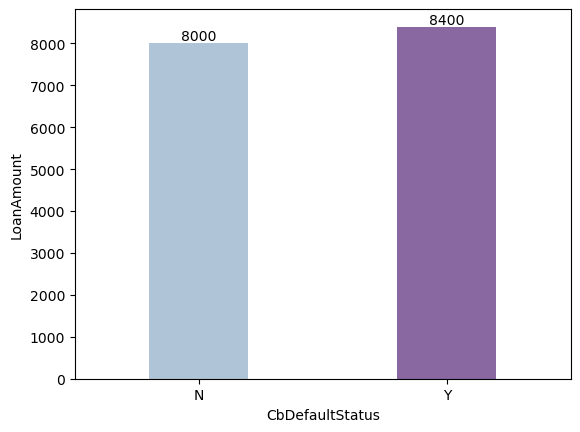

In [38]:
default_loanamnt = df.groupby(['CbDefaultStatus'])['LoanAmount'].median().reset_index()

# Create a bar plot with specified width and palette
ax = sns.barplot(data=default_loanamnt, x='CbDefaultStatus', y='LoanAmount', width=0.4, palette='BuPu')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)
plt.title("")
# Show the plot
plt.show()

`Observation`:

**Comparison of Loan Amounts:**

- The graph compares loan amounts between two different categories of CbDefaultStatus.
- The two categories are represented by “Y” and “N.”
- Individuals with a “Y” status (presumably indicating default) have a higher average loan amount compared to those with an “N” status (presumably indicating no default).

**Trend Highlight:**

- The difference in average loan amounts between the two groups is visually evident.
- This suggests that individuals who default (category “Y”) tend to take larger loans on average.
- Risk and Loan Amount Correlation:
- The graph indirectly highlights the risk associated with larger loans.
- Borrowers with higher loan amounts may face challenges in repayment, leading to defaults.

### Loan Status on Credit History

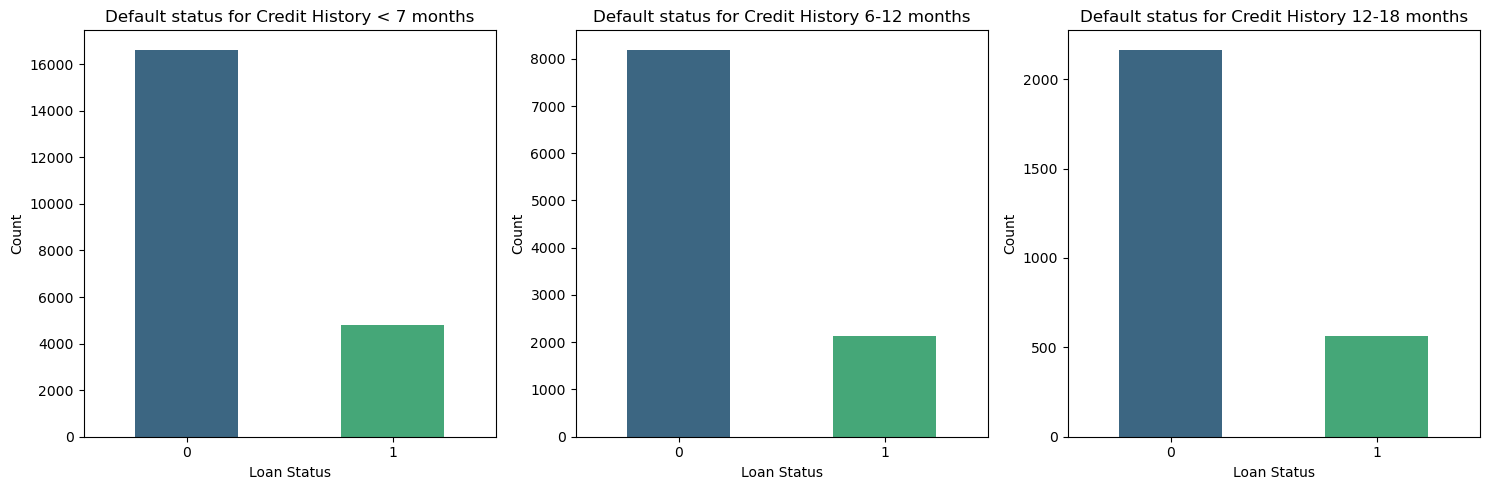

In [39]:
credit_6 = df[df['CreditHistory'] < 7]
credit_12 = df[(df['CreditHistory'] >= 6) & (df['CreditHistory'] < 13)]
credit_18 = df[(df['CreditHistory'] >= 12) & (df['CreditHistory'] < 19)]

# Create subplots for each credit history range
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot count plots for loan status in each credit history range
sns.countplot(x='LoanStatus', data=credit_6, saturation=0.75, width=0.5, ax=axes[0], palette='viridis')
axes[0].set_title('Default status for Credit History < 7 months')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')

sns.countplot(x='LoanStatus', data=credit_12, saturation=0.75, width=0.5, ax=axes[1], palette='viridis')
axes[1].set_title('Default status for Credit History 6-12 months')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Count')

sns.countplot(x='LoanStatus', data=credit_18, saturation=0.75, width=0.5, dodge=True, ax=axes[2], palette='viridis')
axes[2].set_title('Default status for Credit History 12-18 months')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

`Observation`:

**Credit History Less Than 7 Months:**

- The first bar graph represents individuals with a credit history of less than 7 months.
- The default rate (presumably the proportion of defaulted loans) appears to be relatively high.
- This suggests that individuals with shorter credit histories are more likely to default on their loans.

**Credit History 6-12 Months:**

- The second bar graph focuses on individuals with credit histories between 6 and 12 months.
- The default rate seems to be lower compared to the first group.
- While still significant, it indicates a moderate level of risk.

**Credit History 12-18 Months:**
- The third bar graph pertains to individuals with credit histories ranging from 12 to 18 months.
- Notably, the default rate drops significantly in this group.
- Longer credit histories appear to correlate with reduced default rates.

In summary, the graphs visually represent the relationship between loan status and credit history duration. As credit history extends, the risk of default tends to decrease.

### Exploring Customers who defaulted before defaulted again?

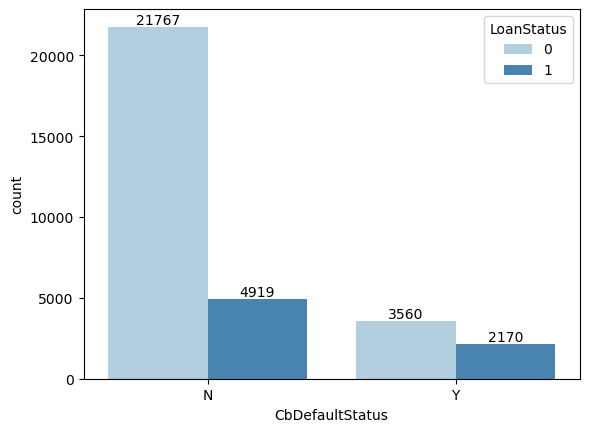

In [82]:
default = df.groupby(['CbDefaultStatus', 'LoanStatus']).size().reset_index(name='count')

# Create a bar plot with default status on x-axis, count on y-axis, and hue for loan status
ax = sns.barplot(x='CbDefaultStatus', y='count', hue='LoanStatus', data=default, palette='Blues')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.show()

`Observations`:
- Customers who didn't defaulted previously again default count is 4919
- Customers who defaulted previously again default count is 2170

### Default Status and Loan Grade

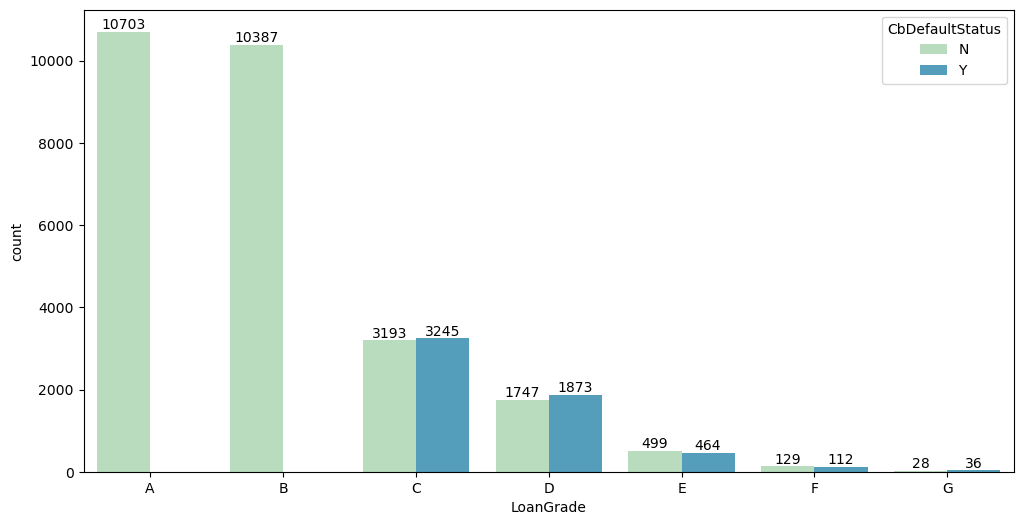

In [41]:
loangrade_default = df.groupby(['LoanGrade', 'CbDefaultStatus']).size().reset_index(name='count')

# Create a bar plot with loan grade on x-axis, count on y-axis, and hue for default status
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='LoanGrade', y='count', hue='CbDefaultStatus', data=loangrade_default, palette='GnBu')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.show()

`Observations`:

**Default Status:**

- The y-axis represents the count of loans.
- The bars are color-coded to represent different default statuses:“Y”: Loans that are in default (higher risk).“N”: Loans that are not in default (lower risk).

**Default Rates by Loan Grade:**

- Notably, the graph reveals that lower-grade loans (e.g., grades F and G) have higher default rates (more “Y” statuses).
- Conversely, higher-grade loans (e.g., grades A and B) have lower default rates (more “N” statuses).

### Let's see the purpose of the loan and let's see if they own a house.

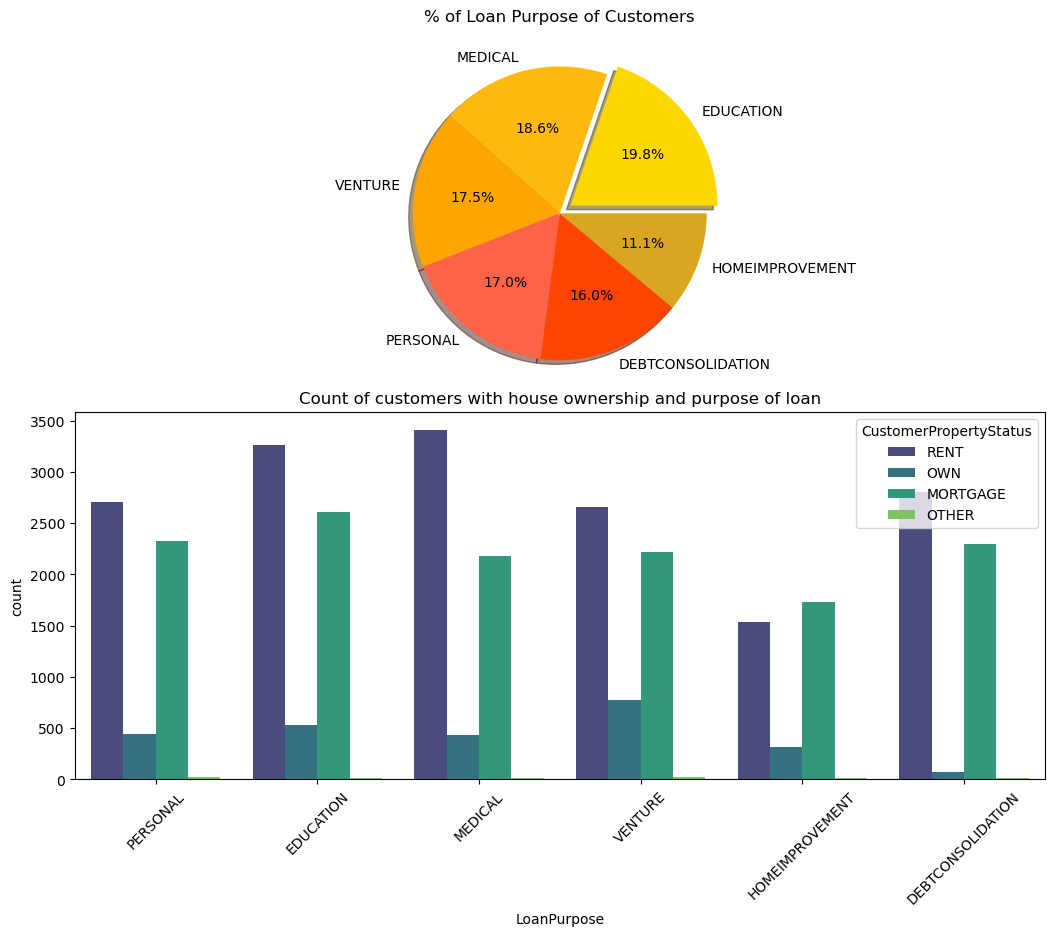

In [42]:
# Calculate the percentage of loan purpose
purpose = df['LoanPurpose'].value_counts() / len(df) * 100

# Define colors and explode values for pie chart
explode = (0.09, 0, 0, 0, 0, 0)
golden_hour_palette = ['#FFD700', '#FFB90F', '#FFA500', '#FF6347', '#FF4500', '#DAA520']

# Create a figure with subplots
plt.figure(figsize=(10, 8))

# Subplot 1: Pie chart for loan purpose distribution
plt.subplot(2, 1, 1)
plt.pie(purpose, labels=purpose.index, autopct='%1.1f%%', explode=explode, shadow=True, colors=golden_hour_palette)
plt.title("% of Loan Purpose of Customers")
plt.tight_layout()

# Subplot 2: Countplot for customers with house ownership and loan purpose
plt.subplot(2, 1, 2)
sns.countplot(x='LoanPurpose', data=df, hue='CustomerPropertyStatus', palette='viridis')
plt.title("Count of customers with house ownership and purpose of loan")
plt.xticks(rotation=45)

# Show the plot
plt.show()

`Observation`: We can see Customers who got loan for different purpose live in rented house, except who got loan for home improvement. 

`Insight`: why customers took loan for home improvement, when they live in Mortgage or rented house?

It is hard to analyze with this limited data, but we can say people live in rented house have existing own house on loan, but get extra loan as home renovation loan. Not sure if this is the case.

### Purpose of Loan and Default

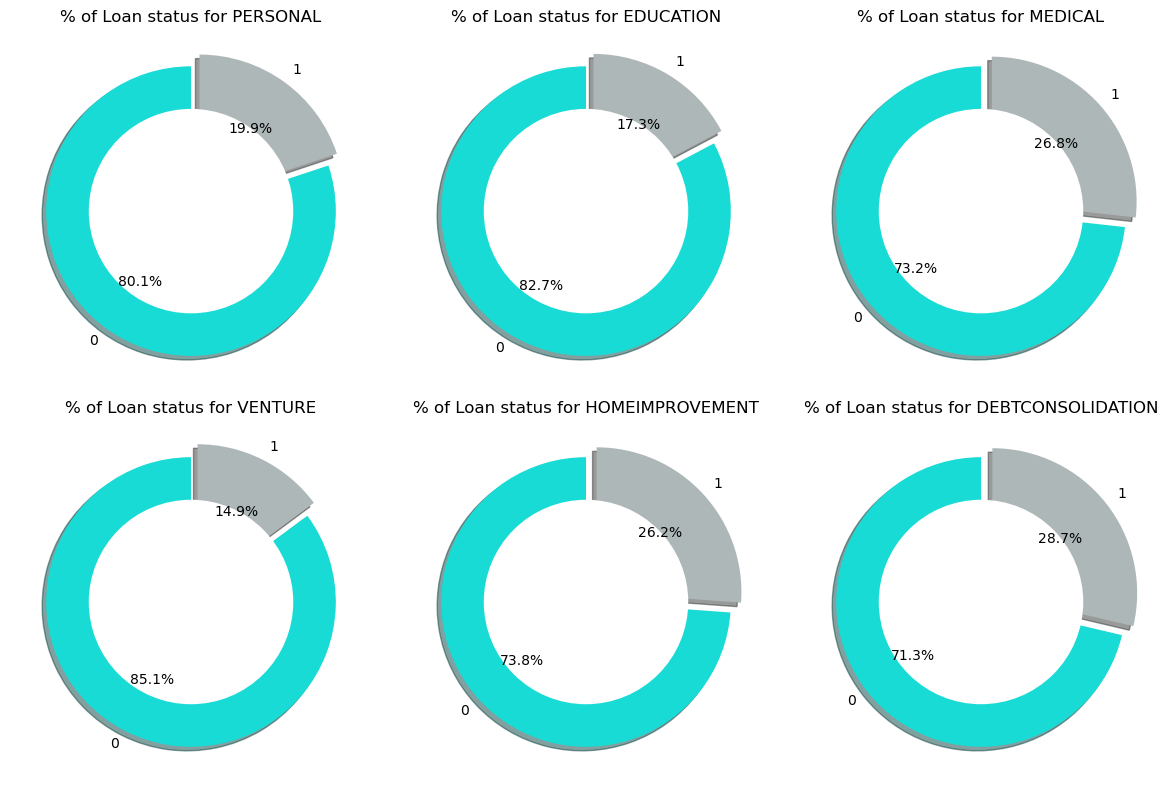

In [43]:
loan_distribution = df.groupby(['LoanPurpose', 'LoanStatus']).size().unstack()
loan_percentage = loan_distribution.div(loan_distribution.sum(axis=1), axis=0) * 100
explode_base = (0.1, 0)


unique_purposes = df['LoanPurpose'].unique()
plt.figure(figsize=(12, 8))

for i, loan_purpose in enumerate(unique_purposes, 1):
    explode = [explode_base[0] if status == 1 else explode_base[1] for status in loan_percentage.columns]
    
    plt.subplot(2, (len(unique_purposes) + 1) // 2, i)
    wedges, texts, autotexts = plt.pie(loan_percentage.loc[loan_purpose], labels=loan_percentage.columns, 
                                       autopct='%1.1f%%', explode=explode, shadow=True, startangle=90,
                                       colors=color1)
    
    centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=1.25)
    plt.gca().add_artist(centre_circle)
    
    plt.title(f"% of Loan status for {loan_purpose}")

plt.tight_layout()
plt.show()

`Observation`: Debt Consolidation has a higher percentage. 

- Debt consolidation is a debt management strategy that involves combining multiple debts into a single, larger loan. The proceeds from the new loan are then used to pay off the other debts.

- Debt consolidation loans may have a fixed interest rate that won't change over the life of the loan. However, you may have to pay an origination fee ranging from 1.00% - 7.99%


### Let's see Grade distribution of Loan Status

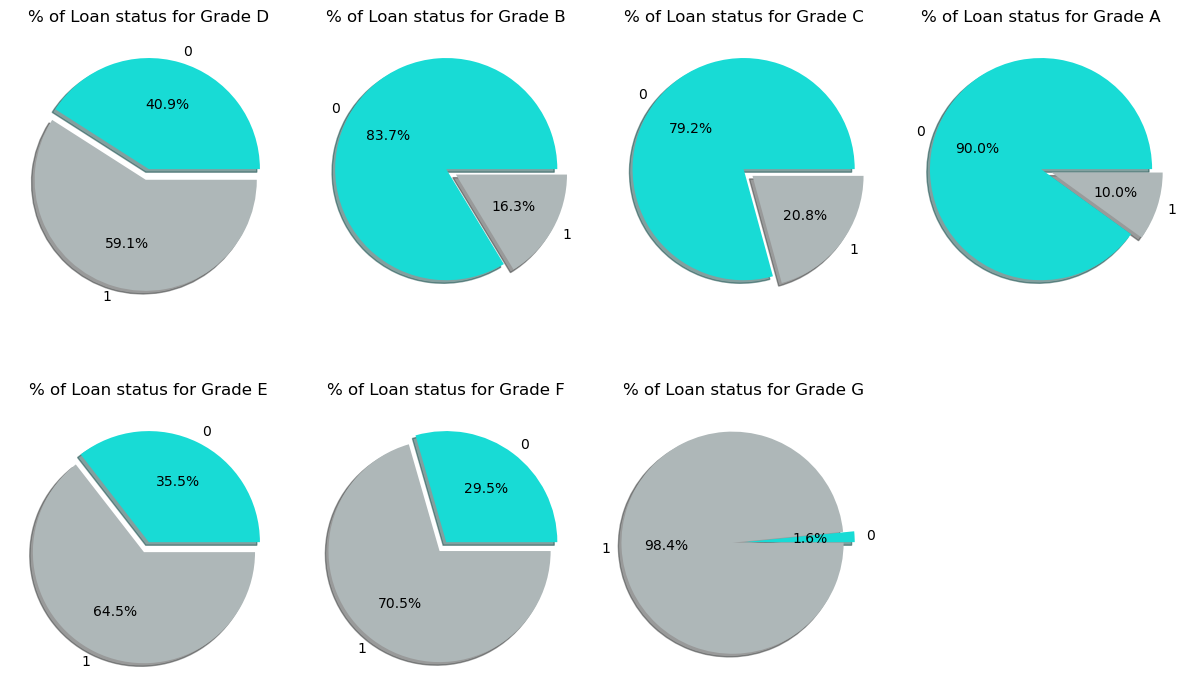

In [44]:
# Group by loan grade and loan status, then calculate percentages
loan_distribution = df.groupby(['LoanGrade', 'LoanStatus']).size().unstack()
loan_percentage = loan_distribution.div(loan_distribution.sum(axis=1), axis=0) * 100

# Define explode values for pie charts
explode_base = (0.1, 0)

# Get unique loan grades
unique_grades = df['LoanGrade'].unique()

# Create a figure with subplots for each loan grade
plt.figure(figsize=(12, 8))

for i, loan_grade in enumerate(unique_grades, 1):
    # Determine explode values based on loan status
    explode = [explode_base[0] if status == 1 else explode_base[1] for status in loan_percentage.columns]
    
    plt.subplot(2, (len(unique_grades) + 1) // 2, i)
    plt.pie(loan_percentage.loc[loan_grade], labels=loan_percentage.columns, explode=explode, 
            autopct='%1.1f%%', shadow=True, colors=color1)
    plt.title(f"% of Loan status for Grade {loan_grade}")

plt.tight_layout()
plt.show()

`Observation`: The percentage of loan approved is increasing with the ascending in Grades. Grade G got has 98.4% of loan approval rate.

`Insight`: Why banks chose to give loans to low grade profile, rather than giving to high grade profiles. Low-Grade: High chance of risk/default. High-Grade- Low chance or Not at all chance of default.

- According to banking calculations G grade loans pay highest interest rate in order to compensate lenders for the increased risk relative to A Grade Loan.
- Besides banks cross check the default history, credit score and credit history before approving the G grade loans

### Exploring Employment History

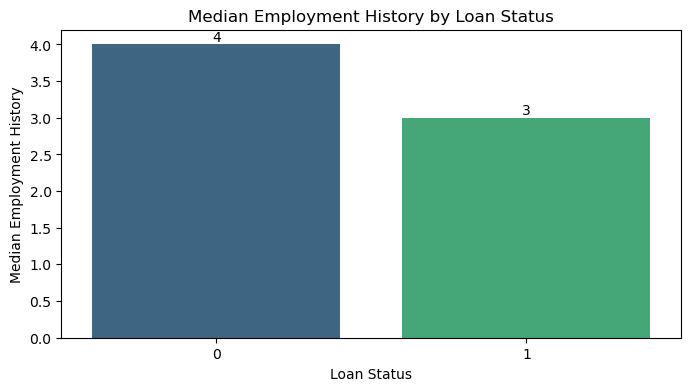

In [45]:
# Group by loan status and calculate median employment history
employment = df.groupby(['LoanStatus'])['EmploymentHistory'].median().reset_index()

# Set the figure size
plt.figure(figsize=(8, 4))

# Create the bar plot
ax = sns.barplot(x='LoanStatus', y='EmploymentHistory', data=employment, palette='viridis')

# Adding labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Set the x-axis label
plt.xlabel('Loan Status')

# Set the y-axis label
plt.ylabel('Median Employment History')

# Set the plot title
plt.title('Median Employment History by Loan Status')

# Show the plot
plt.show()

`Observations`:

- Median Employment History for Defaulted is 4
- Median Employment History for Non-Defaulted is 3

- It indicated people who has been a long term employee are repaying their loans

### Loan Grade on Employment History

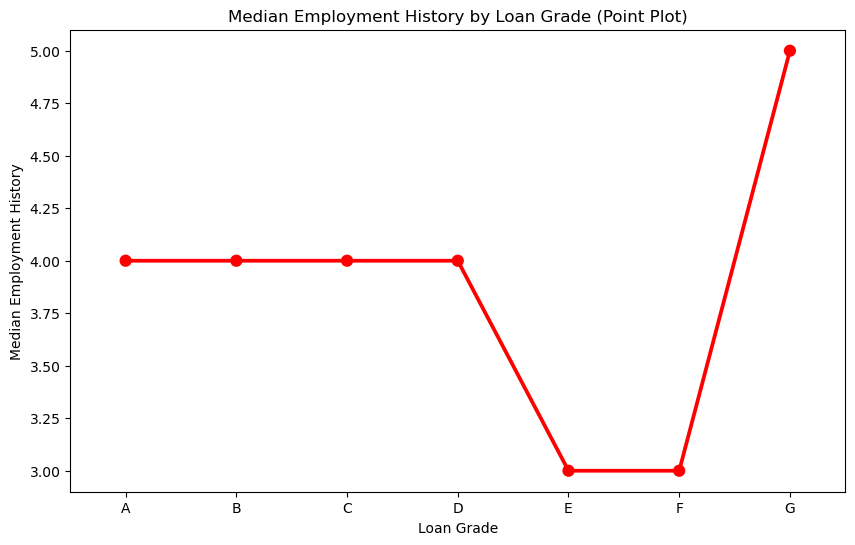

In [46]:
# Group by loan grade and calculate median employment history
emp_loanGrade = df.groupby(['LoanGrade'])['EmploymentHistory'].median().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the point plot
sns.pointplot(x='LoanGrade', y='EmploymentHistory', data=emp_loanGrade, color='red')

# Set the x-axis label
plt.xlabel('Loan Grade')

# Set the y-axis label
plt.ylabel('Median Employment History')

# Set the plot title
plt.title('Median Employment History by Loan Grade (Point Plot)')

# Show the plot
plt.show()

`Observation`:

**Loan Grades A to D:**

- For loan grades A to D, the median employment history appears to be consistent.
- Individuals in these loan grades have similar employment histories.

**Loan Grades F and G:**

- Surprisingly, there is a significant increase in the median employment history for loan grades F and G.
- This unexpected trend suggests that individuals with lower loan grades (F and G) have longer employment histories compared to those with better loan grades.

### Multivariate Analysis

### Exploring if Customer's Age has any relation on Interest rate and Loan Grade

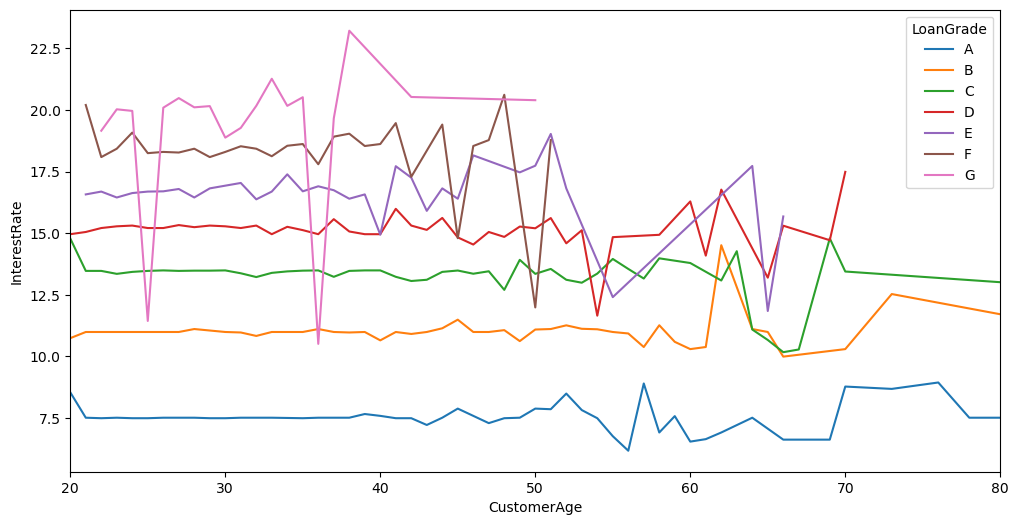

In [47]:
# Group by loan grade, customer age, and calculate median interest rate
age_interest = df.groupby(['LoanGrade', 'CustomerAge'])['InterestRate'].median().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(x='CustomerAge', y='InterestRate', hue='LoanGrade', data=age_interest)

# Set the x-axis limit
plt.xlim(20, 80)

# Show the plot
plt.show()

`Observation`:

**Interest Rates by Age:*8

- The x-axis represents customer age.
- The y-axis represents interest rates.
- Each line corresponds to a specific loan grade (A, B, C, D, E, F, G).

**Variability Across Grades:**

- The lines exhibit different patterns:
- Higher-grade loans (A and B) tend to have lower interest rates across all age groups.
- Lower-grade loans (F and G) show higher interest rates across various age brackets.
- Grades C and D fall in between, maintaining relatively consistent interest rates.

**Risk Assessment and Trends:**

- This graph provides insights into lending trends and risk assessments.
- It suggests that older customers (higher age) may face higher interest rates for riskier loans (grades F and G).
- Conversely, younger customers (lower age) with better creditworthiness (grades A and B) enjoy lower interest rates.

In [48]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(df,train_size=0.8,random_state=42)

In [49]:
transformer = ColumnTransformer(transformers=[
    ('tnsf1', OrdinalEncoder(categories=[['G', 'F', 'E', 'D', 'C', 'B', 'A']]), ['LoanGrade']),
    ('tnsf2', OneHotEncoder(sparse=False,dtype='int'), ['LoanPurpose','CustomerPropertyStatus'])
])

# Fit and transform the transformers
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

# Get feature names for OneHotEncoded columns
feature_names = ['LoanGrade'] + transformer.transformers_[1][1].get_feature_names_out().tolist()

# Create DataFrames with correct column names
x_train_scaled = pd.DataFrame(x_train_transformed, columns=feature_names)
x_test_scaled = pd.DataFrame(x_test_transformed, columns=feature_names)
x = pd.concat([x_train_scaled, x_test_scaled])

In [52]:
# Create a new DataFrame 'x' and copy selected columns from 'df'
x = pd.DataFrame()
x[['CustomerAge', 'CustomerIncome', 'EmploymentHistory', 'LoanAmount', 'InterestRate',
   'LoanStatus','CbDefaultStatus', 'CreditHistory']] = df[[
       'CustomerAge', 'CustomerIncome', 'EmploymentHistory', 'LoanAmount', 'InterestRate',
       'LoanStatus', 'CbDefaultStatus', 'CreditHistory']]

# Replace 'Y' with 1 and 'N' with 0 in the 'CbDefaultStatus' column of 'x'
x['CbDefaultStatus'] = x['CbDefaultStatus'].replace({'Y': 1, 'N': 0})

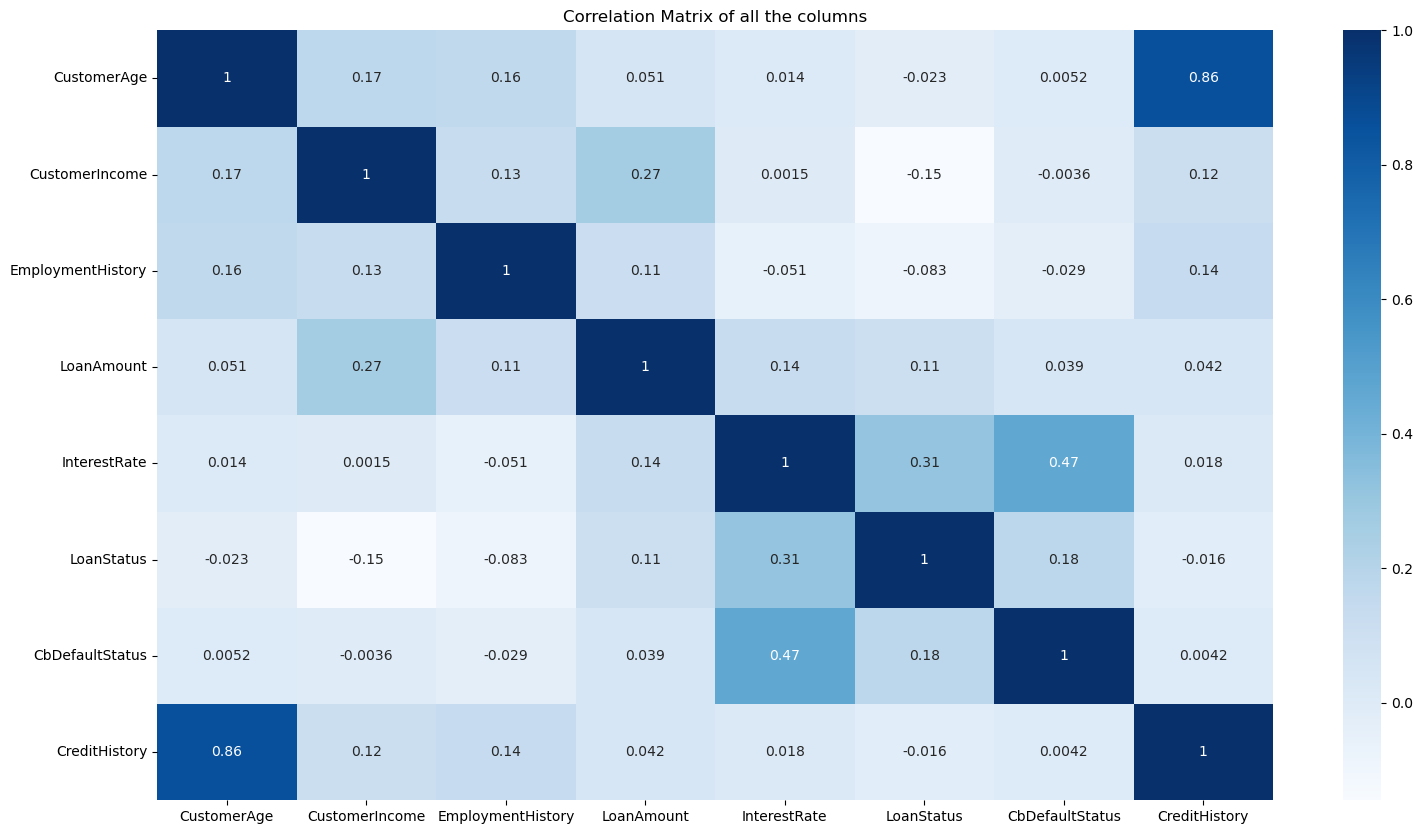

In [53]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create a heatmap of the correlation matrix of 'x' with annotations and a Blue colormap
sns.heatmap(x.corr(), annot=True, cmap='Blues')

# Set the title of the heatmap
plt.title("Correlation Matrix of all the columns")

# Display the heatmap
plt.show()

In [83]:
x.corr()['LoanStatus']

CustomerAge         -0.022698
CustomerIncome      -0.145005
EmploymentHistory   -0.082512
LoanAmount           0.105736
InterestRate         0.314114
LoanStatus           1.000000
CbDefaultStatus      0.179385
CreditHistory       -0.016498
Name: LoanStatus, dtype: float64

`Observation`: 
- Interest Rate has high correlation among the all other variables 
- previous Default Status has some moderate correlation 
- Loan Amount also has some moderate correlation

### Let's Remove all the Outliers According to the data

In [63]:
## IQR Calculating for age column
perc_25_age = df['CustomerAge'].quantile(0.25)
perc_75_age = df['CustomerAge'].quantile(0.75)

iqr_age = perc_75_age - perc_25_age

upper_bound_age = perc_75_age + 1.5 * iqr_age
lower_bound_age = perc_25_age - 1.5 * iqr_age

# IQR Calculating for Income column
perc_25_income = df['CustomerIncome'].quantile(0.25)
perc_75_income = df['CustomerIncome'].quantile(0.75)

iqr_income = perc_75_income - perc_25_income

upper_bound_income = perc_75_income + 1.5 * iqr_income
lower_bound_income = perc_25_income - 1.5 * iqr_income

## IQR Calculating for Employement History column
perc_25_emp = df['EmploymentHistory'].quantile(0.25)
perc_75_emp = df['EmploymentHistory'].quantile(0.75)

iqr_emp = perc_75_emp - perc_25_emp

upper_bound_emp = perc_75_emp + 1.5 * iqr_emp
lower_bound_emp = perc_25_emp - 1.5 * iqr_emp

## IQR Calculating for Loan Amount
perc_25_amount = df['LoanAmount'].quantile(0.25)
perc_75_amount = df['LoanAmount'].quantile(0.75)

iqr_amount = perc_75_amount - perc_25_amount

upper_bound_amount = perc_75_amount + 1.5 * iqr_amount
lower_bound_amount = perc_25_amount - 1.5 * iqr_amount

## IQR Calculating for credit history
perc_25_credit = df['CreditHistory'].quantile(0.25)
perc_75_credit = df['CreditHistory'].quantile(0.75)

iqr_credit = perc_75_credit - perc_25_credit

upper_bound_credit = perc_75_credit + 1.5 * iqr_credit
lower_bound_credit = perc_25_credit - 1.5 * iqr_credit


print("Upper Bound Age:",upper_bound_age, "Lower Bound Age:",lower_bound_age)
print("Upper Bound Amount:",upper_bound_amount, "Lower Bound Amount:",lower_bound_amount)
print("Upper Bound Emp:",upper_bound_emp, "Lower Bound Emp:",lower_bound_emp)
print("Upper Bound Income:",upper_bound_income, "Lower Bound Income:",lower_bound_income)
print("Upper Bound Credit:",upper_bound_credit, "Lower Bound Credit:",lower_bound_credit)

Upper Bound Age: 40.5 Lower Bound Age: 12.5
Upper Bound Amount: 23125.0 Lower Bound Amount: -5875.0
Upper Bound Emp: 14.5 Lower Bound Emp: -5.5
Upper Bound Income: 140232.0 Lower Bound Income: -22472.0
Upper Bound Credit: 15.5 Lower Bound Credit: -4.5


In [64]:
df_outliers = df.copy()

## We are using boolean indexing to filter out outliers and keep the values equivalent or less than upper bound
df_outliers = df_outliers[df_outliers['CustomerAge'] <= upper_bound_age]
df_outliers = df_outliers[df_outliers['CustomerIncome'] <= upper_bound_income]
df_outliers = df_outliers[df_outliers['EmploymentHistory'] <= upper_bound_emp]
df_outliers = df_outliers[df_outliers['LoanAmount'] <= upper_bound_amount]
df_outliers = df_outliers[df_outliers['CreditHistory'] <= upper_bound_credit]

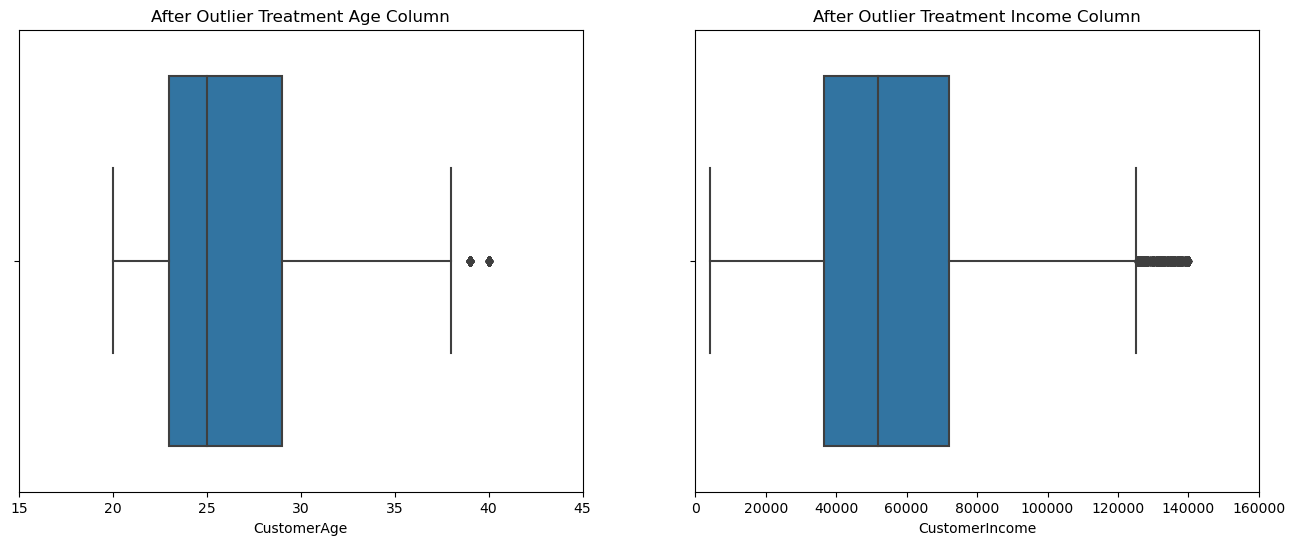

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'CustomerAge' after outlier treatment
sns.boxplot(x=df_outliers['CustomerAge'], ax=axes[0])
axes[0].set_title('After Outlier Treatment Age Column')
axes[0].set_xlim(15,45)  # Set the left limit of x-axis to 0

# Plotting boxplot for 'CustomerIncome' after outlier treatment
sns.boxplot(x=df_outliers['CustomerIncome'], ax=axes[1])
axes[1].set_title('After Outlier Treatment Income Column')
axes[1].set_xlim(0,160000)  # Set the left limit of x-axis to 0

# Display the plots
plt.show()

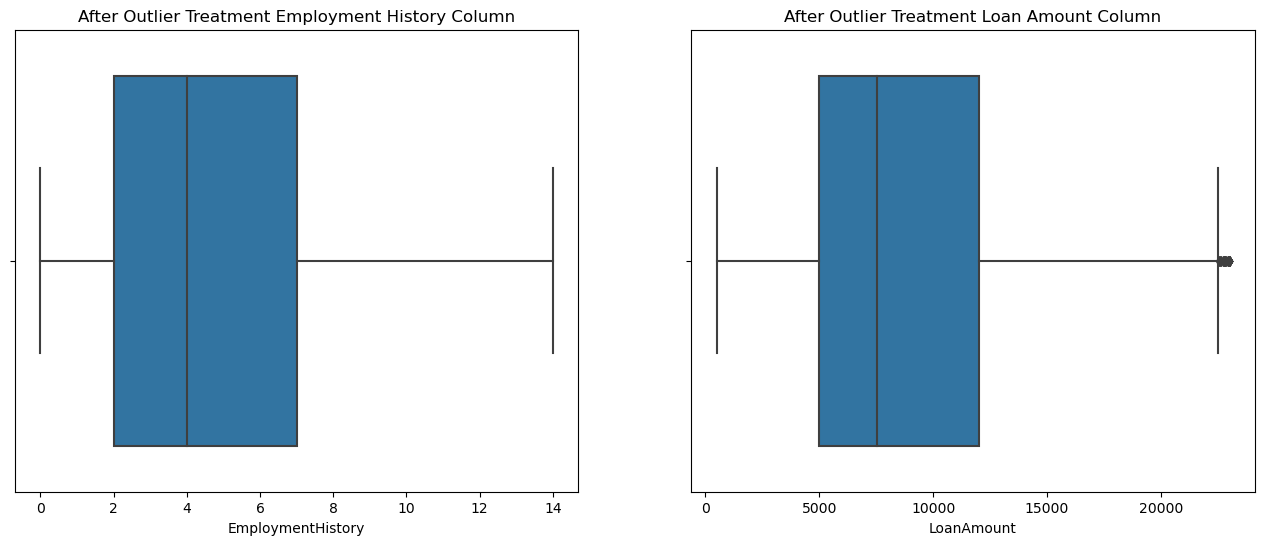

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'CustomerAge' after outlier treatment
sns.boxplot(x=df_outliers['EmploymentHistory'], ax=axes[0])
axes[0].set_title('After Outlier Treatment Employment History Column')
#axes[0].set_xlim(15,45)  # Set the left limit of x-axis to 0

# Plotting boxplot for 'CustomerIncome' after outlier treatment
sns.boxplot(x=df_outliers['LoanAmount'], ax=axes[1])
axes[1].set_title('After Outlier Treatment Loan Amount Column')
#axes[1].set_xlim(0,160000)  # Set the left limit of x-axis to 0

# Display the plots
plt.show()

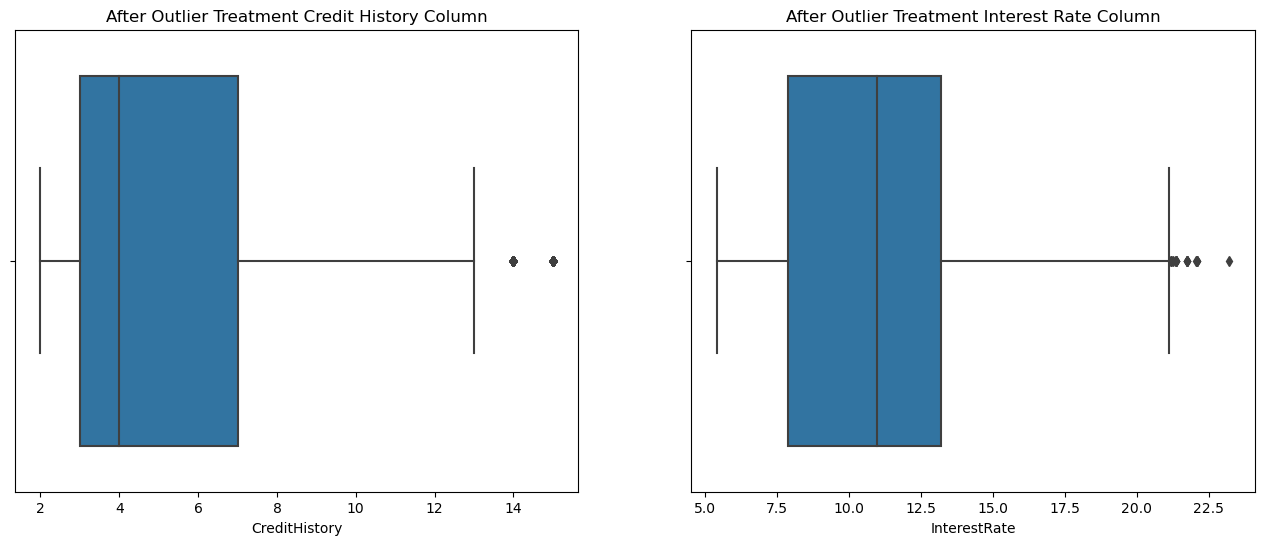

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting distribution plot for 'CustomerAge' after outlier treatment
sns.boxplot(x=df_outliers['CreditHistory'], ax=axes[0])
axes[0].set_title('After Outlier Treatment Credit History Column')
#axes[0].set_xlim(15,45)  # Set the left limit of x-axis to 0

# Plotting boxplot for 'CustomerIncome' after outlier treatment
sns.boxplot(x=df_outliers['InterestRate'], ax=axes[1])
axes[1].set_title('After Outlier Treatment Interest Rate Column')
#axes[1].set_xlim(0,160000)  # Set the left limit of x-axis to 0

# Display the plots
plt.show()

# <center> CONCLUSION

**By thorough analysis we can conclude that high interest rates, Historical Default Status, Loan Amount cause customers to default on their Loans** 